## 探索性数据分析

#### 探索数据的常规步骤

1. 了解数据集结构。
2. 计算描述统计量。
3. 处理缺失值和异常值。
4. 查看变量分布。
5. 探索变量间的关系。

EDA是建模前的重要阶段，为了有效地探索数据，建议把常规分析和开放性问题相结合，逐步探索。

以iris数据集为例，从UCI下载数据。iris包含150个观测值和4个特征。

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
iris = pd.read_csv(url, header = None, names = names)

## 1. 数据集结构

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
iris.shape

(150, 5)

## 2. 描述统计量

常用的样本统计量包括均值，标准差，中位数，最小值，最大值等。

描述统计量能够大概描述(数值)特征的分布；重点检查均值，最小值和最大值，它们能够提示是否存在异常值，例如人均收入不能为负，年龄不可能大于150等。

只有数值变量才能计算描述统计量。

In [11]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 3. 缺失值和异常值

iris是学习型数据集，不存在缺失值。这里看是否存在异常值(outlier)，所谓异常值就是显著偏僻其它样本点的观测值。

异常值产生的原因有很多，例如观测值来源于其它分布，记录错误，也可能真实存在但出现概率极小。

检测异常值的常用方法：1.标准化；2.箱线图。

### 3.1 将特征标准化

In [13]:
features_zscore = iris.iloc[:,0:4].apply(lambda x: (x - np.mean(x)) / np.std(x))
features_zscore.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [14]:
(np.abs(features_zscore) > 3).sum()

sepal_length    0
sepal_width     1
petal_length    0
petal_width     0
dtype: int64

### 3.2 箱线图

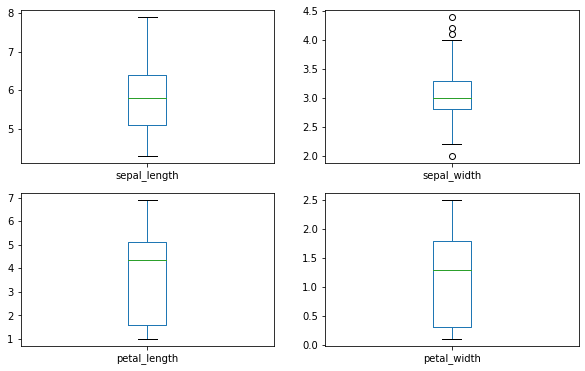

In [15]:
axes = iris.plot.box(figsize = (10, 6.18),
                     subplots = True,
                     layout = (2, 2),
                     sharex = False,
                     sharey = False)

## 4. 变量分布

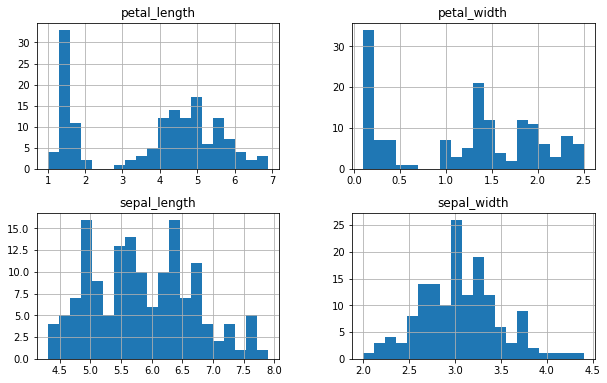

In [18]:
axes = iris.hist(bins=20,
                 figsize=(10, 6.18),
                 layout=(2, 2))

## 5. 变量间的关系

变量通常分为数值(定量)和名义(定性)变量，根据它们的组合，采用不同的方法：

* 数值变量：相关系数矩阵，散点图矩阵
* 分类变量：列联表
* 数值/分类：分类汇总，如箱线图

了解特征分布和关联是特征选择(feature selection)的前提，尤其是当数据集拥有非常多特征时。

### 5.1 相关系数矩阵

In [19]:
corr = iris.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


相关系数矩阵的可视化。

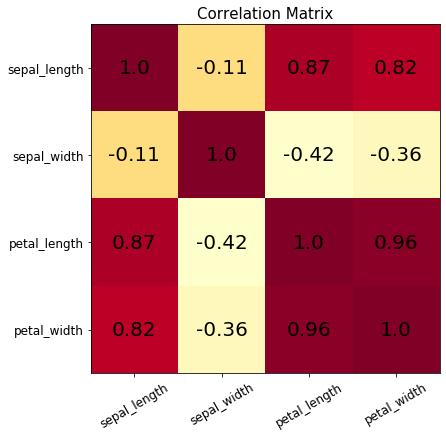

In [20]:
fig, ax = plt.subplots(figsize = (10, 6.18))

ax.imshow(corr, cmap = "YlOrRd")

ax.set_xticks(np.arange(corr.shape[1]))
ax.set_xticklabels(corr.columns, fontsize=12)
ax.set_yticks(np.arange(corr.shape[0]))
ax.set_yticklabels(corr.index, fontsize=12)

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(i, j, round(corr.iloc[i,j], 2),
                horizontalalignment="center",
                verticalalignment="center",
                fontsize=20, color="black")

ax.set_title("Correlation Matrix", fontsize=15)

for xtick in ax.get_xticklabels():
    xtick.set_rotation(30)

plt.tight_layout()

### 5.2 散点图矩阵

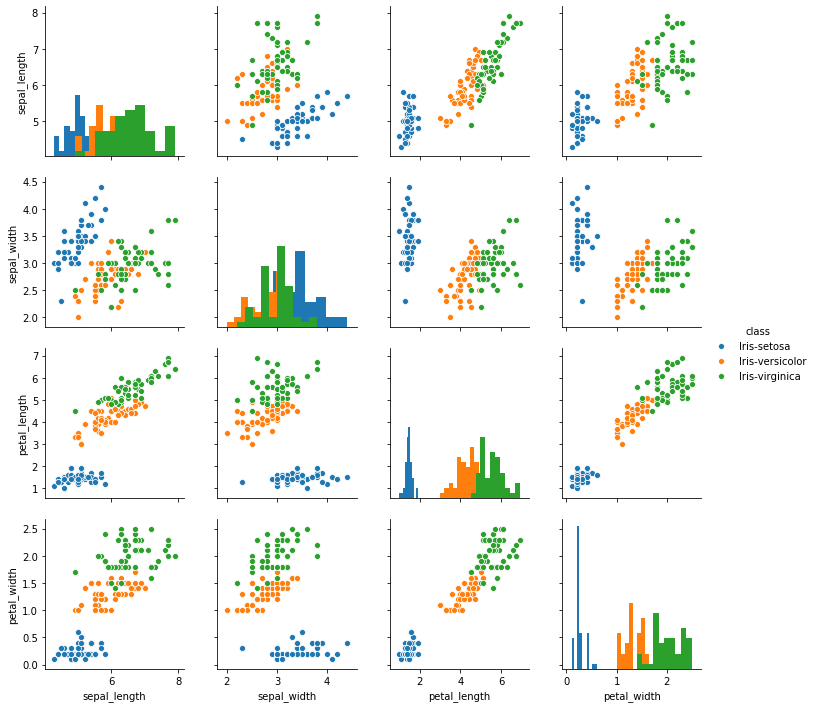

In [21]:
import seaborn as sns
# sns.set_style("darkgrid")

sns.pairplot(iris, 
             hue = "class",  # 将数值变量按分类变量分类
             kind = "scatter",  # "scatter" or "reg"
             diag_kind = "hist")  # "hist" or "kde"

### 5.3 列联表

列联表（crosstab, two-way table）。

从联合分布，边缘分布，条件概率的角度解读结果。

In [22]:
# 将数值变量转化为分类变量
pd.crosstab(index = iris["petal_length"] > iris["petal_length"].mean(),  # factor by the row 
            columns = iris["petal_width"] > iris["petal_width"].mean(),  # factor by the column
            margins = False,   # add row/column subtotals  
            normalize = False) # count or percentage

petal_width,False,True
petal_length,,
False,56,1
True,4,89


### 5.4 分类汇总

将数值变量将某个分类变量的水平值进行分类汇总，查看组内差异。

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D99BF8B38>,
      dtype=object)

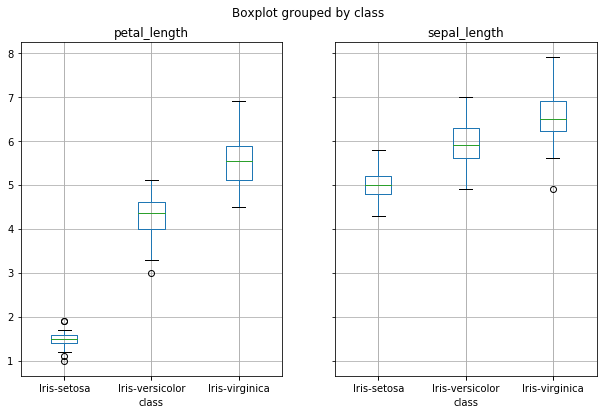

In [23]:
iris.boxplot(column=["petal_length", "sepal_length"],
             by="class",
             figsize=(10, 6.18))